# Lab 6 - Cubic Splines
## March 13 - March 15, 2023
## Student 1 Name: Dhruv Shah  Student 1 ID No: $\underline{202103017}$
## Student 2 Name: Pranav Patel Student 2 ID No. $\underline{202103040}$
## Student 3 Name: Vatsal Shah Student 3 ID No. $\underline{202103022}$
## Date of Submission: $\underline{14/03/23}$
***

In [1]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def find_next_indexes(x, arr):
    next_smaller = None
    next_bigger = None
    for i in range(len(arr)):
        if arr[i] < x:
            if next_smaller is None or arr[i] > arr[next_smaller]:
                next_smaller = i
        elif arr[i] > x:
            if next_bigger is None or arr[i] <= arr[next_bigger]:
                next_bigger = i
    if next_smaller == None:
        next_smaller = 0
    
    return next_smaller, next_bigger

In [3]:
# Functions that Evaluate the S(x) = P(x)_i , where i=0, 1, 2, .., n-1
def S(val, coeff, data_points):
    k, k1 = find_next_indexes(val,data_points)
    poly = coeff[k,:] # some function that returns you the coefficients for the P(x)_i given x
    # poly = poly.reshape((4,1))
    eval = (poly[0] + (poly[1] * val) + (poly[2] * (val**2)) + (poly[3] * (val**3)))    
    return eval

### Q.1 Write a function `mynaturalcubicspline` that takes in two vectors $x,y$, each of size $n$, and ouputs the coefficient vector $v$ of size $4(n-1)$ of the natural cubic spline that interpolates through the given points while ensuring order-$2$ continuity at node points. The function should also plot the graph of the spline function at several intermediate values of $x$.

In [4]:
### Natural Cubic Splines
### def mynaturalcubicsplines(n):

def mynaturalcubicsplines(x, y, n):
    matlar = np.zeros((4*n,4*n))
    # y_fin = np.zeros((4*n,1))
    y_fin = []
    for i in range(n):
        blockMat = []
        x_k = x[i]
        x_k1 = x[i+1]
        y_fin = np.append(y_fin, [y[i], y[i+1], 0, 0])

        r1 = np.array([1, x_k, x_k ** 2, x_k ** 3, 0, 0, 0,0]) # n x 8 
        r2 = np.array([1, x_k1, x_k1 ** 2, x_k1 ** 3, 0, 0, 0,0]) # n x 8
        if(i != n-1):
            r3 = np.array([0, 1, 2 * x_k1, 3 * (x_k1 ** 2), 0, -1, -2 * x_k1, -3 * (x_k1 ** 2) ]) # n-1 x 8 
            r4 = np.array([0, 0, 2, 6 * x_k1, 0, 0, -2, -6 * x_k1 ]) # n-1 x 8

            blockMat = np.vstack((r1, r2, r3, r4))
            matlar[4*i:4*i+4,4*i:4*i+8] = blockMat
        else :
            r1 = r1[:4]
            r2 = r2[:4]
            blockMat = np.vstack((r1, r2))
            matlar[4*i:4*i+2,4*i:4*i+4] = blockMat 

    matlar[4*n-2:4*n-1,0:4] = np.array([0,0,2,6*x[0]])
    matlar[4*n-1:4*n, 4*n-4:4*n] = np.array([0,0,2,6*x[n]])
    y_fin = np.reshape(y_fin, (4*n,1))

    coeff = np.linalg.solve(matlar, y_fin)
    coeff_eval = np.reshape(coeff, (len(x) - 1,4))

    x_plot = np.linspace(x[0], x[len(x)-1], 1000)
    y_plot = []
    plt.scatter(x,y)
    for i in range(len(x_plot)):
        val = S(x_plot[i], coeff_eval, x)
        y_plot = np.append(y_plot, val)
    plt.plot(x_plot, y_plot, color='b')
    plt.show()
    
    return coeff

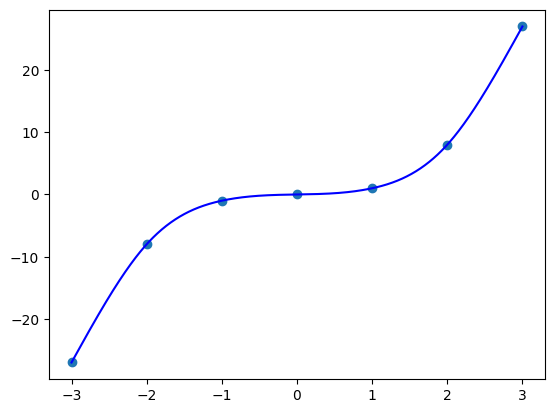

In [5]:
# matlar = np.zeros((12, 12))
x = [-3, -2, -1, 0, 1, 2, 3]
y = [-27, -8, -1, 0, 1, 8, 27]
n = len(x)
coeff = mynaturalcubicsplines(x, y, n - 1)
# print(coeff)

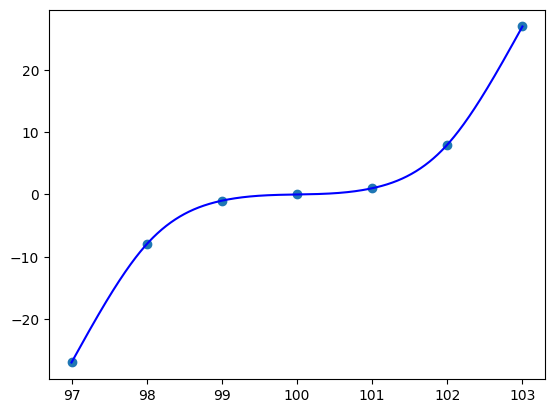

In [6]:
x_n = np.array(x) + 100
coeff_n = mynaturalcubicsplines(x_n, y, len(x) - 1)

In [7]:
print(coeff_n.reshape(4*(n-1),))
print(coeff.reshape(4*(n-1),))

[ 2.5533428e+06 -7.9013800e+04  8.1480000e+02 -2.8000000e+00
 -1.9643788e+06  5.9283800e+04 -5.9640000e+02  2.0000000e+00
 -8.0002000e+05  2.4000200e+04 -2.4000000e+02  8.0000000e-01
 -8.0002000e+05  2.4000200e+04 -2.4000000e+02  8.0000000e-01
 -2.0363812e+06  6.0723800e+04 -6.0360000e+02  2.0000000e+00
  3.0574172e+06 -8.9093800e+04  8.6520000e+02 -2.8000000e+00]
[-3.7200000e+01 -5.3800000e+01 -2.5200000e+01 -2.8000000e+00
  1.2000000e+00  3.8000000e+00  3.6000000e+00  2.0000000e+00
  0.0000000e+00  2.0000000e-01 -8.8817842e-16  8.0000000e-01
  0.0000000e+00  2.0000000e-01 -8.8817842e-16  8.0000000e-01
 -1.2000000e+00  3.8000000e+00 -3.6000000e+00  2.0000000e+00
  3.7200000e+01 -5.3800000e+01  2.5200000e+01 -2.8000000e+00]


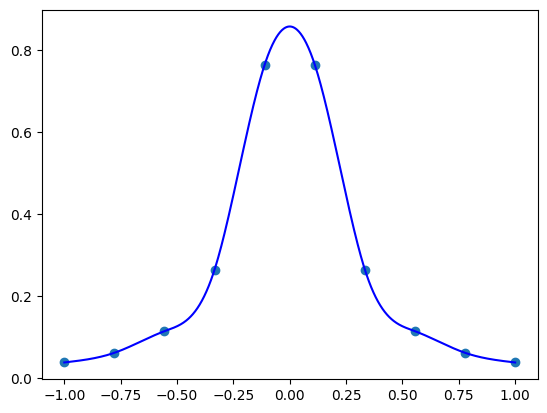

In [8]:
def f(x):
  return 1 /(1 + 25 * (x**2))
f = np.vectorize(f)

n = 10
x1 = np.linspace(-1, 1, n)
y1 = f(x1) 
c1 = mynaturalcubicsplines(x1, y1, n-1)

### Q.1(a) Show plots of some examples of natural cubic splines for a few set of data points. Demonstrate the invariance to shifting the $x$ points by an arbitrary constant. Is it exactly invariant or approximately invariant? Explain why.

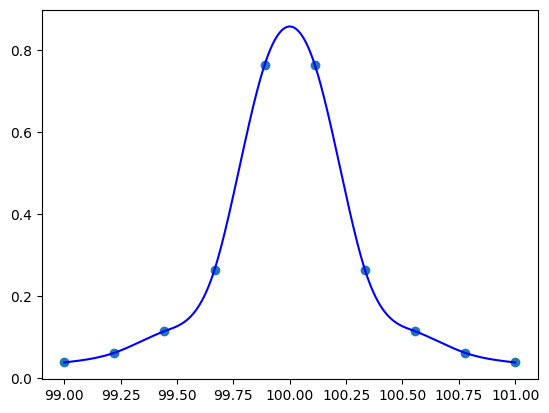

In [9]:
### Examples of Natural cubic spline fitting.

x_new = np.array(x1 + 100)
# print(x_new.shape)
c_new = mynaturalcubicsplines(x_new, y1, n-1)

In [10]:
print(c1.reshape(4*(n-1),))
print(c_new.reshape(4*(n-1),))

[ 9.51357590e-01  2.61048037e+00  2.54637648e+00  8.48792159e-01
 -1.95034672e-01 -1.81131836e+00 -3.13879331e+00 -1.58770918e+00
  2.08494248e+00  1.05005583e+01  1.90225846e+01  1.17091176e+01
  8.26581576e-01 -8.24689886e-01 -1.49531599e+01 -2.22666269e+01
  8.57125646e-01  2.98832079e-15 -7.53095090e+00 -3.03359495e-14
  8.26581576e-01  8.24689886e-01 -1.49531599e+01  2.22666269e+01
  2.08494248e+00 -1.05005583e+01  1.90225846e+01 -1.17091176e+01
 -1.95034672e-01  1.81131836e+00 -3.13879331e+00  1.58770918e+00
  9.51357590e-01 -2.61048037e+00  2.54637648e+00 -8.48792159e-01]
[-8.23588485e+05  2.49570998e+04 -2.52091270e+02  8.48792153e-01
  1.55650221e+06 -4.70053289e+04  4.73173970e+02 -1.58770921e+00
 -1.15199398e+07  3.47479515e+05 -3.49371273e+03  1.17091177e+01
  2.21171787e+07 -6.65009004e+05  6.66503495e+03 -2.22666270e+01
 -7.53085204e+04  1.50618623e+03 -7.53091134e+00 -1.32070207e-07
 -2.24162405e+07  6.70990276e+05 -6.69494135e+03  2.22666273e+01
  1.19003959e+07 -3.5508

### <font color="red"> Ans 1. Write your observations/explanations here <font>
We observe that the coefficients of the interpolated polynomial change when the $x$ points are shifted by an arbitrary constant.
    

***
### Q.2 Let us now use splines to model curves in $\mathbb{R}^2$ (in general $\mathbb{R}^n$). The curve can be now represented by a tuple of functions, each for one coordinate: $c(t) = (x(t),y(t)),t\in [a,b]$. Such a representation of the curve is called a *parametric representation*, where the parameter is the variable $t$. One way to think about this representation is to think of the functions $x,y$ as describing the  coordinates of a particle with respect to time $t$. In case, $x(a)=x(b), y(a)=y(b)$ then the curve becomes a closed curve.

### Now, for a closed curve, assume that the functions $x,y$ are cubic splines (not natural though) with respect to the parameter $t$. Assume that $t \in [-1,1]$, and that curve passes through $x_k,y_k$ at uniformly sampled values of $t$ in the given interval.

### For a *closed cubic spline curve* with $n$ given points $\{(x_k,y_k),k=0,\ldots,n-1\}$ through which the curve should pass through, how many cubic polynomials will be required. Derive the equations that arise from continuity upto order $2$ at each of the given points. 

### <font color="white"> Ans(2) : Give your answer and derivation here
For the closed cubic splines, we need the following conditions to be imposed on the interval $[a,b]$. 
1. The curve should pass through $x(t_k)=x_k$ and $y(t_k)=y_k$.
2. Also the equations $x(t_{k+1})=x_{k+1}$ and $y(t_{k+1})=y_{k+1}$ should satisfy.
3. The first derivatives should be equal: $x'(t_k) = x'(t_{k+1})$ and $y'(t_k) = y'(t_{k+1})$  
4. The second derivatives should also be equal: $ x''(t_k) = x''(t_{k+1})$ and 
$y''(t_k) = y''(t_{k+1})$
5. Now as we want a closed cubic spline, for that we will need the following conditions: $x(t_0) = x(t_{n-1}) , y(t_0) = y(t_{n-1}) , x'(t_0) = x'(t_{n-1}) , y'(t_0) = y'(t_{n-1}) , x''(t_0) = x''(t_{n-1}) , y''(t_0) = y''(t_{n-1})$

Here since we have $n-1$ intervals as $k=0,1,..,n-1$. Hence we need $n$ interpolating polynomials.




### Q.2(a) Write a function `mycubicclosedcurve` that takes in two vectors $x,y$ each of size $n \times 1$, where $(x_k,y_k),k=1,\ldots,n$ are the points through which the parametric curve should pass through for uniformly sampled parameter on the interval $[-1,1]$. The function should return two vectors $v_x,v_y$ each corresponding to the coefficients of the spline $x(t),y(t)$ representing a closed curve satisfying the given conditions, incl. $x(-1)=x(1),y(-1)=y(1)$. Your function should also plot several intermediate points. An Example is shown below for 4 points.

<div>
<img src="attachment:example.png" width="300"/>
</div>

In [11]:
def mycubicclosedcurve(x, y, n):
  matlar = np.zeros((4*n,4*n))
  # y_fin = np.zeros((4*n,1))
  y_fin = []
  for i in range(n):
      blockMat = []
      x_k = x[i]
      x_k1 = x[i+1]
      y_fin = np.append(y_fin, [y[i], y[i+1], 0, 0])

      r1 = np.array([1, x_k, x_k ** 2, x_k ** 3, 0, 0, 0,0]) # n x 8 
      r2 = np.array([1, x_k1, x_k1 ** 2, x_k1 ** 3, 0, 0, 0,0]) # n x 8
      if(i != n-1):
          r3 = np.array([0, 1, 2 * x_k1, 3 * (x_k1 ** 2), 0, -1, -2 * x_k1, -3 * (x_k1 ** 2) ]) # n-1 x 8 
          r4 = np.array([0, 0, 2, 6 * x_k1, 0, 0, -2, -6 * x_k1 ]) # n-1 x 8

          blockMat = np.vstack((r1, r2, r3, r4))
          matlar[4*i:4*i+4,4*i:4*i+8] = blockMat
      else :
          r1 = r1[:4]
          r2 = r2[:4]
          blockMat = np.vstack((r1, r2))
          matlar[4*i:4*i+2,4*i:4*i+4] = blockMat 

  matlar[4*n-2:4*n-1,0:4] = np.array([0, 1, 2 * x[0], 3*(x[0] **2)])
  matlar[4*n-2:4*n-1,4*n-4:4*n] = np.array([0, -1, -2 * x[len(x) - 1], -3*(x[len(x) - 1] **2)])

  
  matlar[4*n-1:4*n,0:4] = np.array([0, 0, 2, 6 * x[0] ])
  matlar[4*n-1:4*n,4*n-4:4*n] = np.array([0, 0, -2, -6* x[len(x) - 1] ])

  # print(matlar.shape)
  # print(matlar)

  y_fin = np.reshape(y_fin, (4*n,1))
  # print(y_fin)

  coeff = np.linalg.solve(matlar, y_fin)
  coeff_eval = np.reshape(coeff, (len(x) - 1,4))

  # x_plot = np.linspace(x[0], x[len(x)-1], 1000)
  # y_plot = []
  # plt.scatter(x,y)
  # for i in range(len(x_plot)):
  #     val = S(x_plot[i], coeff_eval, x)
  #     y_plot = np.append(y_plot, val)
  # plt.plot(x_plot, y_plot, color='b')
  # plt.show()

  return coeff_eval
    
  

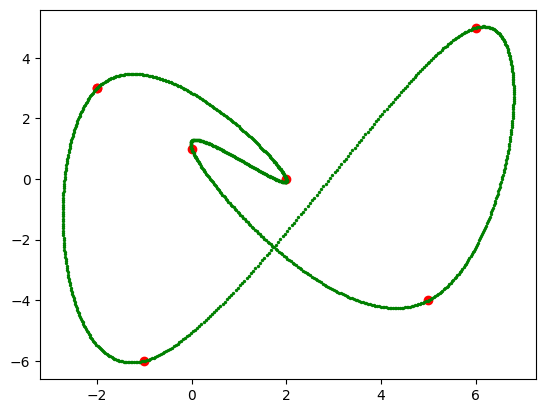

In [12]:
### Planar Closed Cubic Spline curve

x = [-2, 2, 0, 5, 6, -1, -2]
y = [3, 0, 1, -4, 5, -6, 3]
n = len(x)
t = np.linspace(-1, 1, len(x))

plt.show()
vx = mycubicclosedcurve(t, x, n-1)
vy = mycubicclosedcurve(t, y, n-1)
vx = np.reshape(vx, (len(x) - 1, 4))
vy = np.reshape(vy, (len(x) - 1, 4))


t_x = np.linspace(-1, 1, 1000)
x_t = []
y_t = []

for i in range(len(t_x)):
  x_t = np.append(x_t, S(t_x[i], vx, t))
  y_t = np.append(y_t, S(t_x[i], vy, t))

plt.scatter(x, y, color='r')
plt.scatter(x_t, y_t, s=2, color='g')


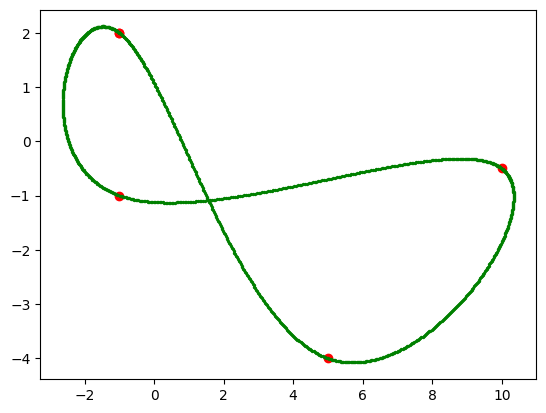

In [13]:
### Show some examples of curves with different number of points as input
x = [-1, -1, 10, 5, -1]
y = [2, -1, -0.5, -4, 2]
n = len(x)
t = np.linspace(-1, 1, len(x))

plt.show()
vx = mycubicclosedcurve(t, x, n-1)
vy = mycubicclosedcurve(t, y, n-1)
vx = np.reshape(vx, (len(x) - 1, 4))
vy = np.reshape(vy, (len(x) - 1, 4))


t_x = np.linspace(-1, 1, 1000)
x_t = []
y_t = []

for i in range(len(t_x)):
  x_t = np.append(x_t, S(t_x[i], vx, t))
  y_t = np.append(y_t, S(t_x[i], vy, t))

plt.scatter(x, y, color='r')
plt.scatter(x_t, y_t, s=2, color='g')